# Assignment 04

## Downloading and importing requiered libraries and datasets

In [743]:
!pip install numpy
!pip install tensorflow
!pip instal matplotib
!pip install sklearn
!pip install pandas

ERROR: unknown command "instal" - maybe you meant "install"


### Importing laibraries

In [744]:
import numpy as np
import tensorflow as tf
from sklearn import datasets, model_selection
import matplotlib as plt
import pandas as pd

### Importing data sets

In [745]:
x_iris, y_iris = datasets.load_iris(return_X_y = True)
x_wine, y_wine = datasets.load_wine(return_X_y = True)

In [746]:
print('x: ', x_iris, '\n','y: ', y_iris)
print('-'*50)
print('x: ', x_wine, '\n','y: ', y_wine)

x:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.

## Setting the model

### Data splitting to start setting models

In [747]:
#Splitting iris dataset to train and test sets
x_train_iris, x_test_iris, y_train_iris, y_test_iris = model_selection.train_test_split(x_iris, y_iris, test_size = 0.1, stratify = y_iris, random_state = 42) #random states should be setted to 42 and y should be stratified
#Splitting wine dataset to train and test sets
x_train_wine, x_test_wine, y_train_wine, y_test_wine = model_selection.train_test_split(x_wine, y_wine, test_size = 0.1, stratify = y_wine, random_state = 42) #random states should be setted to 42 and y should be stratified

In [748]:
#viewing the shape of all the dataset's splits
x_train_iris.shape, x_test_iris.shape, y_train_iris.shape, y_test_iris.shape

((135, 4), (15, 4), (135,), (15,))

In [749]:
#viewing the shape of all the dataset's splits
x_train_wine.shape, x_test_wine.shape, y_train_wine.shape, y_test_wine.shape

((160, 13), (18, 13), (160,), (18,))

In [750]:
# transforming outputs to  onehot encoding
y_train_iris_onehot, y_test_iris_onehot = tf.one_hot(y_train_iris, depth = len(set(y_train_iris))), tf.one_hot(y_test_iris, depth = len(set(y_test_iris)))

y_train_wine_onehot, y_test_wine_onehot = tf.one_hot(y_train_wine, depth = len(set(y_train_wine))), tf.one_hot(y_test_wine, depth = len(set(y_test_wine)))

### Building models

In [751]:
#Setting tensorflow random state
tf.random.set_seed(42)

In [752]:
iris_model = tf.keras.Sequential([
                                  tf.keras.layers.Input(shape = 4), #equals the shape of the data array
                                  tf.keras.layers.Dense(units = 128, activation = tf.keras.layers.LeakyReLU(0.1), name = 'L1'), #leaky relu worked good for this model
                                  tf.keras.layers.Dropout(0.01), #randomly dropping out 1% of the inputs
                                  tf.keras.layers.Dense(units = len(set(y_train_iris)), activation = 'softmax', name = 'L_out') #outputs layer
])

In [753]:
wine_model = tf.keras.Sequential([
                                  tf.keras.layers.Input(shape = 13), #equals the shape of the data array
                                  tf.keras.layers.Dense(units = 128, activation = 'sigmoid', name = 'L1'), #sigmoid worked good for this model
                                  tf.keras.layers.Dropout(0.01), #randomly dropping out 1% of the inputs
                                  tf.keras.layers.Dense(units = len(set(y_train_wine)), activation = 'softmax', name = 'L_out') #outputs layer
])

### Model layers summary and flow

In [754]:
iris_model.summary()

Model: "sequential_98"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 128)               640       
_________________________________________________________________
dropout_35 (Dropout)         (None, 128)               0         
_________________________________________________________________
L_out (Dense)                (None, 3)                 387       
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________


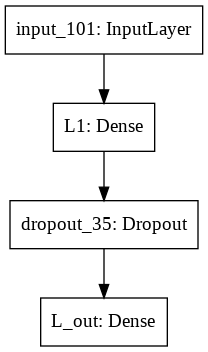

In [755]:
tf.keras.utils.plot_model(iris_model)

In [756]:
wine_model.summary()

Model: "sequential_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 128)               1792      
_________________________________________________________________
dropout_36 (Dropout)         (None, 128)               0         
_________________________________________________________________
L_out (Dense)                (None, 3)                 387       
Total params: 2,179
Trainable params: 2,179
Non-trainable params: 0
_________________________________________________________________


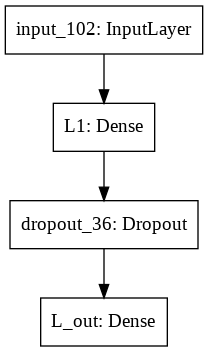

In [757]:
tf.keras.utils.plot_model(wine_model)

### Compiling

In [758]:
iris_model.compile(optimizer = tf.optimizers.Adam(), loss = tf.losses.MeanSquaredError(), metrics = tf.metrics.CategoricalAccuracy())

In [759]:
wine_model.compile(optimizer = tf.optimizers.Adam(), loss = tf.losses.MeanSquaredError(), metrics = tf.metrics.CategoricalAccuracy())

### Fitting

In [760]:
iris_model.fit(x_train_iris, y_train_iris_onehot, epochs = 64, validation_data = (x_test_iris, y_test_iris_onehot))

Epoch 1/64
5/5 [==============================] - 0s 38ms/step - loss: 0.2483 - categorical_accuracy: 0.3183 - val_loss: 0.2280 - val_categorical_accuracy: 0.3333
Epoch 2/64
5/5 [==============================] - 0s 9ms/step - loss: 0.2301 - categorical_accuracy: 0.2677 - val_loss: 0.2117 - val_categorical_accuracy: 0.3333
Epoch 3/64
5/5 [==============================] - 0s 10ms/step - loss: 0.2168 - categorical_accuracy: 0.3474 - val_loss: 0.1947 - val_categorical_accuracy: 0.6667
Epoch 4/64
5/5 [==============================] - 0s 10ms/step - loss: 0.1956 - categorical_accuracy: 0.6543 - val_loss: 0.1781 - val_categorical_accuracy: 0.6667
Epoch 5/64
5/5 [==============================] - 0s 11ms/step - loss: 0.1795 - categorical_accuracy: 0.6633 - val_loss: 0.1620 - val_categorical_accuracy: 0.6667
Epoch 6/64
5/5 [==============================] - 0s 10ms/step - loss: 0.1591 - categorical_accuracy: 0.7123 - val_loss: 0.1490 - val_categorical_accuracy: 0.6667
Epoch 7/64
5/5 [=======

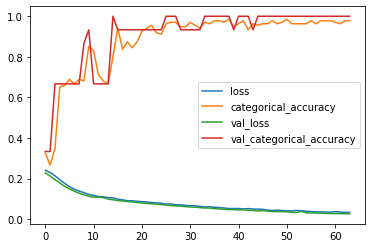

In [761]:
# ploting the output graphs
iris_df=pd.DataFrame(iris_model.history.history)
iris_df.plot.line()

In [762]:
wine_model.fit(x_train_wine, y_train_wine_onehot, epochs = 64, validation_data = (x_test_wine, y_test_wine_onehot))

Epoch 1/64
5/5 [==============================] - 0s 40ms/step - loss: 0.2799 - categorical_accuracy: 0.3384 - val_loss: 0.2431 - val_categorical_accuracy: 0.3333
Epoch 2/64
5/5 [==============================] - 0s 9ms/step - loss: 0.2404 - categorical_accuracy: 0.3929 - val_loss: 0.2220 - val_categorical_accuracy: 0.6111
Epoch 3/64
5/5 [==============================] - 0s 10ms/step - loss: 0.2244 - categorical_accuracy: 0.4274 - val_loss: 0.2132 - val_categorical_accuracy: 0.5000
Epoch 4/64
5/5 [==============================] - 0s 9ms/step - loss: 0.2129 - categorical_accuracy: 0.3445 - val_loss: 0.2034 - val_categorical_accuracy: 0.3889
Epoch 5/64
5/5 [==============================] - 0s 9ms/step - loss: 0.2111 - categorical_accuracy: 0.3675 - val_loss: 0.1971 - val_categorical_accuracy: 0.3889
Epoch 6/64
5/5 [==============================] - 0s 10ms/step - loss: 0.1993 - categorical_accuracy: 0.5519 - val_loss: 0.1943 - val_categorical_accuracy: 0.6667
Epoch 7/64
5/5 [=========

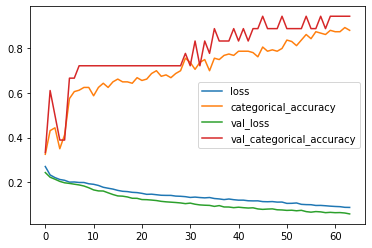

In [763]:
# ploting the output graphs
wine_df=pd.DataFrame(wine_model.history.history)
wine_df.plot.line()